**Exploratory Data Analysis**

In [ ]:
!pip install datasets
!pip install pandas requests onedrivedownloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import requests
import io
import pandas as pd

# Import the download function instead of OneDriveDownloader class
from onedrivedownloader import download

# Main dataset is kept here
onedrive_link = "https://indianinstituteofscience-my.sharepoint.com/:u:/g/personal/rishavg_iisc_ac_in/Ecr2JHgh-2VBg3bYhcqFQKYBcpNLNsLEPfGNLAKfdKckfQ"

# Extract the file ID from the OneDrive link - not needed for current download method
file_id = onedrive_link.split('/')[-1]  # Assuming the file ID is the last part of the URL

# Download the file using the download function
# filename should be provided and the file will be automatically saved, you can directly input your local path
download(onedrive_link, filename="all_users_rating.tsv")

'all_users_rating.tsv'

In [ ]:
import pandas as pd

all_users_rating_df = pd.read_csv("all_users_rating.tsv", sep='\t', on_bad_lines='skip')

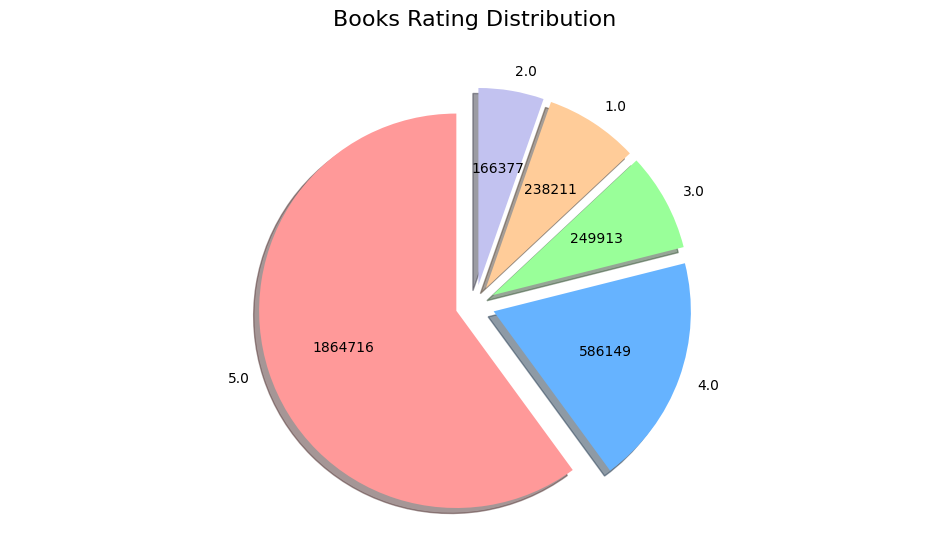

In [ ]:
#Plot of ratings on a scale of 1 to 5
import matplotlib.pyplot as plt

rating_counts = all_users_rating_df['star_rating'].value_counts()
labels = rating_counts.index.tolist()
counts = rating_counts.values.tolist()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

# Explode all slices
explode = [0.1] * len(counts)

plt.figure(figsize=(12, 6))
plt.pie(counts,
        labels=labels,
        colors=colors,
        autopct=lambda p: '{:.0f}'.format(p * sum(counts) / 100),
        startangle=90,
        explode=explode,
        shadow=True,
        textprops={'fontsize': 10})

plt.title('Books Rating Distribution', fontsize=16, pad=30)
plt.axis('equal')
plt.show()


In [ ]:
# Most Rating Customers
customers_with_most_ratings = all_users_rating_df.groupby('customer_id').size().sort_values(ascending=False)[:10]
customers_with_most_ratings

,0
customer_id,
50122160,21922
50732546,9963
52615377,2664
45041039,2215
50776149,1797
50913245,1786
20595117,1643
45273033,1622
39569598,1416


In [ ]:
#Top 10 books with most number of ratings and it's average rating.

# Group by product_id and calculate the number of ratings and average rating
book_ratings = all_users_rating_df.groupby(['product_id', 'product_title']).agg({'star_rating': ['mean', 'count']})

# Flatten the column names
book_ratings.columns = ['average_rating', 'rating_count']

# Sort by rating count in descending order and get the top 10
top_rated_books = book_ratings.sort_values('rating_count', ascending=False)

top_rated_books.head(10)

,,average_rating,rating_count
product_id,product_title,,
043935806X,Harry Potter and the Order of the Phoenix (Book 5),4.394378,4625
0439139597,Harry Potter And The Goblet Of Fire (Book 4),4.775876,3739
0525947647,Lies and the Lying Liars Who Tell Them,3.849531,2665
0895260174,Unfit For Command: Swift Boat Veterans Speak Out Against John Kerry,3.448184,2615
0385504209,The Da Vinci Code,3.479675,2583
0590353403,Harry Potter And The Sorcerer's Stone,4.787315,2365
0439784549,Harry Potter and the Half-Blood Prince (Book 6),4.239766,2052
0316666343,The Lovely Bones,3.799802,2023
1400050308,Treason: Liberal Treachery from the Cold War to the War on Terrorism,2.966574,1795


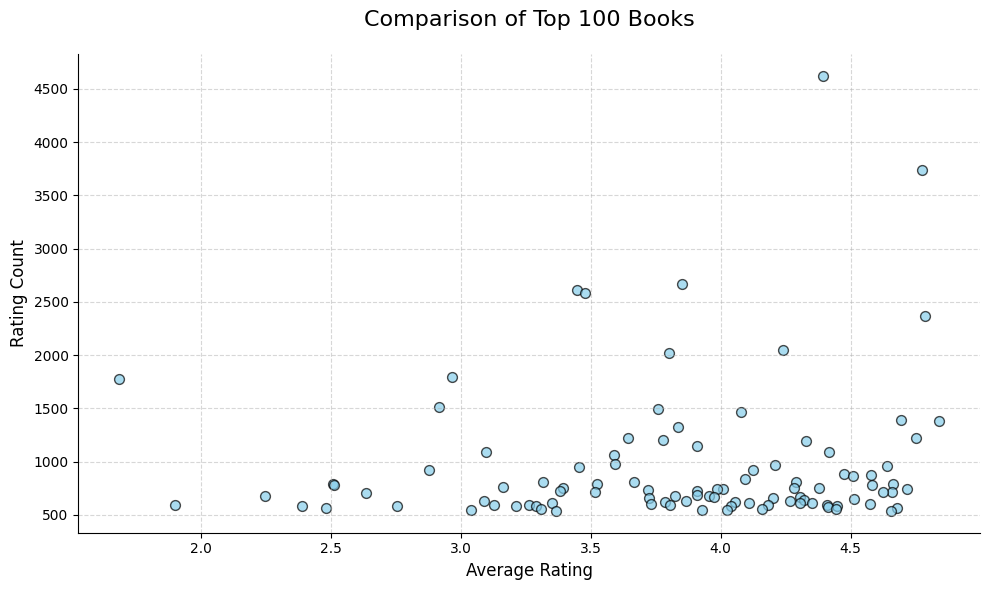

In [ ]:
#average_rating vs rating_count

from matplotlib import pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(top_rated_books.head(100)['average_rating'],
            top_rated_books.head(100)['rating_count'],
            s=50,
            alpha=0.7,
            color='skyblue',
            edgecolors='black')

plt.title('Comparison of Top 100 Books', fontsize=16, pad=20)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Rating Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

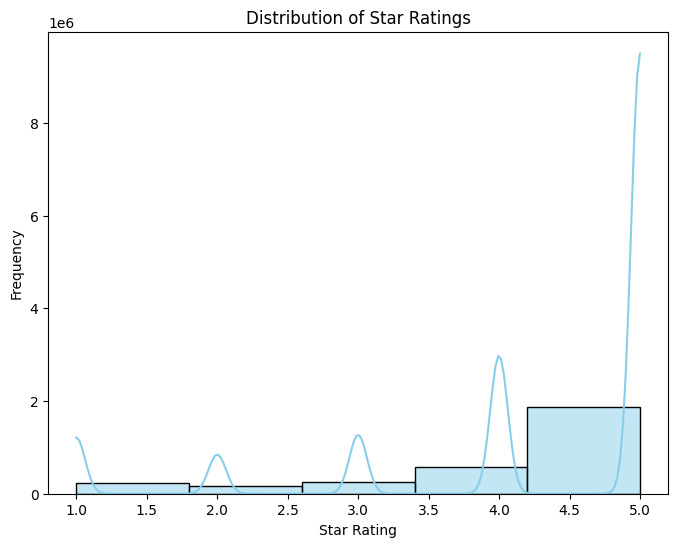

In [ ]:


import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(all_users_rating_df['star_rating'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()



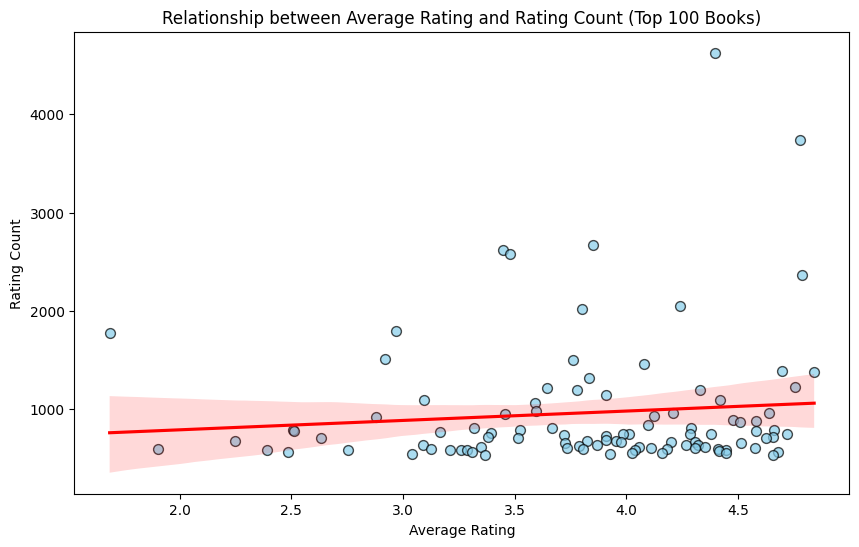

In [ ]:
# Relationship between average rating and rating count (enhanced visualization)
plt.figure(figsize=(10, 6))
sns.regplot(x='average_rating', y='rating_count', data=top_rated_books.head(100), scatter_kws={'s': 50, 'alpha': 0.7, 'color': 'skyblue', 'edgecolors': 'black'}, line_kws={'color': 'red'})
plt.title('Relationship between Average Rating and Rating Count (Top 100 Books)')
plt.xlabel('Average Rating')
plt.ylabel('Rating Count')
plt.show()

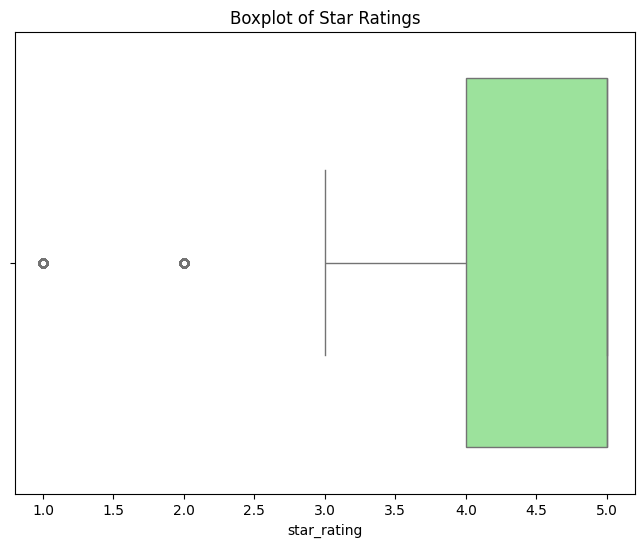

In [ ]:
# Boxplot of ratings
plt.figure(figsize=(8, 6))
sns.boxplot(x='star_rating', data=all_users_rating_df, color='lightgreen')
plt.title('Boxplot of Star Ratings')
plt.show()
